In [1]:
import pandas as pd
import numpy as np
from loaders import *
import pandas as pd
import seaborn as sns

# Variable required in the loader.py
    # BASELINE
    BASELINE_DIR = DESIGN_DIR / 'baseline'
    BASELINE_ARCH = BASELINE_DIR / 'arch/2level.arch.yaml'
    BASELINE_COMPONENTS = BASELINE_DIR / 'components'
    BASELINE_MAPPER = BASELINE_DIR / 'mapper/mapper.yaml'
    BASELINE_SPARSE_OPT = BASELINE_DIR / 'sparse-opt'
    BASELINE_CONSTRAINTS_SUPPORT = BASELINE_DIR / 'constraints/constraints_support.yaml'
    BASELINE_CONSTRAINTS_OUTPUT = BASELINE_DIR / 'constraints/constraints_output.yaml'
    BASELINE_PROB_L1_SUPPORT = BASELINE_DIR / 'prob/GCN_layer1_support.yaml'
    BASELINE_PROB_L1_OUTPUT = BASELINE_DIR / 'prob/GCN_layer1_output.yaml'
    BASELINE_PROB_L2_SUPPORT = BASELINE_DIR / 'prob/GCN_layer2_support.yaml'
    BASELINE_PROB_L2_OUTPUT = BASELINE_DIR / 'prob/GCN_layer2_output.yaml'
    
    # AWB
    AWB_DIR = DESIGN_DIR / 'awb'
    AWB_ARCH = AWB_DIR / 'arch/system_arch_1x16.yaml'
    AWB_SPARSE_OPT = AWB_DIR / 'sparse_opt'
    
    AWB_ARCH_0_1 = AWB_DIR / 'arch/system_arch_1x16-row1.yaml'
    AWB_ARCH_0_2 = AWB_DIR / 'arch/system_arch_1x16-row2.yaml'
    AWB_PROB_L1_OUTPUT_0_1 = AWB_DIR / 'prob/Adjacent/GCN_layer1_row1.yaml'
    AWB_PROB_L1_OUTPUT_0_2 = AWB_DIR / 'prob/Adjacent/GCN_layer1_row2.yaml'
    
    AWB_ARCH_1_PE = AWB_DIR / 'arch/awb_arch.yaml'
    AWB_PROB_WIDGET_R2 = AWB_DIR / 'prob/GCN_layer1_output_widget_r2.yaml'

## No Sparse Optimization

Latency and Energy for each layer:

||**Latency (# of cycles)**| **Energy (pJ/Algorithmic-Compute)** |
|-|-|-|
|**Layer 1-Support**|18496|11.79|
|**Layer 1-Output**|18496|11.79|
|**Layer 2-Support**|2176|11.69|
|**Layer 2-Output**|4624|11.79|

If using 1x16 PE array

||**Latency (# of cycles)**| **Energy (pJ/Algorithmic-Compute)** |
|-|-|-|
|**Layer 1-Support**|1156|5.36|
|**Layer 1-Output**|1156|5.36|
|**Layer 2-Support**|136|4.73|
|**Layer 2-Output**|289|5.36|

In [66]:
l1_support = run_timeloop_mapper(
    ConfigRegistry.AWB_ARCH,
    ConfigRegistry.BASELINE_COMPONENTS,
    ConfigRegistry.BASELINE_PROB_L1_SUPPORT,
    ConfigRegistry.BASELINE_MAPPER,
    ConfigRegistry.BASELINE_CONSTRAINTS_SUPPORT,
#     ConfigRegistry.BASELINE_SPARSE_OPT / 'skipping.yaml'
)
print(l1_support[0])

input file: tmp.yaml
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___/ 
                                  /_/      

Problem configuration complete.
execute:/usr/local/bin/accelergy tmp.yaml --oprefix timeloop-mapper. -o ./ > timeloop-mapper.accelergy.log 2>&1
Generate Accelergy ERT (energy reference table) to replace internal energy model.
Generate Accelergy ART (area reference table) to replace internal area model.
Architecture configuration complete.
Sparse optimization configuration complete.
Using threads = 4
Mapper configuration complete.
Initializing Index Factorization subspace.
  Factorization options along problem dimension N = 9
  Factorization options along problem dimension I = 9
  Factorization options along problem dimension O = 15
Mapspace Dimension [IndexFactorization] Size: 1215
Mapspace Dimension [Loo

[  0] Utilization = 0.06 | pJ/Compute =   11.788 | L1[IWS] O1 - L0[] O16 I34 N34 
[  2] Utilization = 0.24 | pJ/Compute =    7.666 | L1[IWS] N17 I17 O2 O2Y I2Y - L0[] O4 N2 
[  1] Utilization = 0.47 | pJ/Compute =    6.129 | L1[IWS] N17 O8 O2Y I2Y N2Y - L0[] I17 
[  3] Utilization = 0.47 | pJ/Compute =    6.129 | L1[IWS] N17 I17 O2 O2Y I2Y N2Y - L0[] O4 
[  0] Utilization = 0.24 | pJ/Compute =    7.666 | L1[IWS] N17 O8 O2Y I2Y - L0[] I17 N2 
[  2] Utilization = 0.94 | pJ/Compute =    6.513 | L1[IWS] N2 O8Y I2Y - L0[] O2 I17 N17 
[  1] Utilization = 0.94 | pJ/Compute =    6.513 | L1[IWS] N34 O8Y I2Y - L0[] O2 I17 
[  0] Utilization = 0.47 | pJ/Compute =    9.098 | L1[IWS] N2 I17 O2 O8Y - L0[] I2 N17 
[  2] Utilization = 0.94 | pJ/Compute =    5.361 | L1[IWS] I17 O4Y I2Y N2Y - L0[] O4 N17 
[  0] Utilization = 0.47 | pJ/Compute =    6.897 | L1[IWS] I17 O4Y I2Y - L0[] O4 N34 
[  3] Utilization = 0.94 | pJ/Compute =    6.513 | L1[IWS] N34 I17 O8Y I2Y - L0[] O2 
[  0] Utilization = 0.94 | pJ



Summary stats for best mapping found by mapper:
  Utilization = 0.94 | pJ/Compute =    5.361
Buffer and Arithmetic Levels
----------------------------
Level 0
-------
=== MAC ===

    SPECS
    -----
    Word bits             : 8
    Instances             : 17 (1*17)
    Compute energy        : 0.56 pJ

    STATS
    -----
    Utilized instances      : 16
    Computes (total)        : 18496
    Cycles                  : 1156
    Energy (total)          : 10372.56 pJ
    Area (total)            : 5648.25 um^2

Level 1
-------
=== Buffer ===

    SPECS
    -----
        Technology                  : SRAM
        Size                        : 512
        Word bits                   : 8
        Block size                  : 1
        Cluster size                : 1
        Instances                   : 17 (1*17)
        Shared bandwidth            : -
        Read bandwidth              : 5.00
        Write bandwidth             : 5.00
        Multiple buffering          : 1.00
        E

[  0] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[  1] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.


In [3]:
l1_output = run_timeloop_mapper(
    ConfigRegistry.AWB_ARCH,
    ConfigRegistry.BASELINE_COMPONENTS,
    ConfigRegistry.BASELINE_PROB_L1_OUTPUT,
    ConfigRegistry.BASELINE_MAPPER,
    ConfigRegistry.BASELINE_CONSTRAINTS_OUTPUT
)
print(l1_output[0])

input file: tmp.yaml
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___/ 
                                  /_/      

Problem configuration complete.
execute:/usr/local/bin/accelergy tmp.yaml --oprefix timeloop-mapper. -o ./ > timeloop-mapper.accelergy.log 2>&1
Generate Accelergy ERT (energy reference table) to replace internal energy model.
Generate Accelergy ART (area reference table) to replace internal area model.
Architecture configuration complete.
Sparse optimization configuration complete.
Using threads = 4
Mapper configuration complete.
Initializing Index Factorization subspace.
  Factorization options along problem dimension N = 9
  Factorization options along problem dimension M = 9
  Factorization options along problem dimension O = 15
Mapspace Dimension [IndexFactorization] Size: 1215
Mapspace Dimension [Loo

[  0] Utilization = 0.06 | pJ/Compute =   11.788 | L1[ASO] O1 - L0[] O16 M34 N34 
[  1] Utilization = 0.50 | pJ/Compute =    6.129 | L1[ASO] N17 O8 O2Y M2Y N2Y - L0[] M17 
[  3] Utilization = 0.50 | pJ/Compute =    6.129 | L1[ASO] N17 M17 O2 O2Y M2Y N2Y - L0[] O4 
[  2] Utilization = 0.25 | pJ/Compute =    7.666 | L1[ASO] N17 M17 O2 O2Y M2Y - L0[] O4 N2 
[  0] Utilization = 0.25 | pJ/Compute =    7.666 | L1[ASO] N17 O8 O2Y M2Y - L0[] M17 N2 
[  1] Utilization = 1.00 | pJ/Compute =    6.513 | L1[ASO] N34 O8Y M2Y - L0[] O2 M17 
[  2] Utilization = 1.00 | pJ/Compute =    6.513 | L1[ASO] N2 O8Y M2Y - L0[] O2 M17 N17 
[  3] Utilization = 1.00 | pJ/Compute =    6.513 | L1[ASO] N34 M17 O8Y M2Y - L0[] O2 
[  0] Utilization = 0.50 | pJ/Compute =    9.098 | L1[ASO] N2 M17 O2 O8Y - L0[] M2 N17 
[  2] Utilization = 1.00 | pJ/Compute =    5.361 | L1[ASO] M17 O4Y M2Y N2Y - L0[] O4 N17 
[  0] Utilization = 0.50 | pJ/Compute =    6.897 | L1[ASO] M17 O4Y M2Y - L0[] O4 N34 
[  0] Utilization = 1.00 | pJ



Summary stats for best mapping found by mapper:
  Utilization = 1.00 | pJ/Compute =    5.361
Buffer and Arithmetic Levels
----------------------------
Level 0
-------
=== MAC ===

    SPECS
    -----
    Word bits             : 8
    Instances             : 16 (1*16)
    Compute energy        : 0.56 pJ

    STATS
    -----
    Utilized instances      : 16
    Computes (total)        : 18496
    Cycles                  : 1156
    Energy (total)          : 10372.56 pJ
    Area (total)            : 5316.00 um^2

Level 1
-------
=== Buffer ===

    SPECS
    -----
        Technology                  : SRAM
        Size                        : 512
        Word bits                   : 8
        Block size                  : 1
        Cluster size                : 1
        Instances                   : 16 (1*16)
        Shared bandwidth            : -
        Read bandwidth              : 5.00
        Write bandwidth             : 5.00
        Multiple buffering          : 1.00
        E

[  1] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.


In [4]:
l2_support = run_timeloop_mapper(
    ConfigRegistry.AWB_ARCH,
    ConfigRegistry.BASELINE_COMPONENTS,
    ConfigRegistry.BASELINE_PROB_L2_SUPPORT,
    ConfigRegistry.BASELINE_MAPPER,
    ConfigRegistry.BASELINE_CONSTRAINTS_SUPPORT
)
print(l2_support[0])

input file: tmp.yaml
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___/ 
                                  /_/      

Problem configuration complete.
execute:/usr/local/bin/accelergy tmp.yaml --oprefix timeloop-mapper. -o ./ > timeloop-mapper.accelergy.log 2>&1
Generate Accelergy ERT (energy reference table) to replace internal energy model.
Generate Accelergy ART (area reference table) to replace internal area model.
Architecture configuration complete.
Sparse optimization configuration complete.
Using threads = 4
Mapper configuration complete.
Initializing Index Factorization subspace.
  Factorization options along problem dimension N = 9
  Factorization options along problem dimension I = 15
  Factorization options along problem dimension O = 6
Mapspace Dimension [IndexFactorization] Size: 810
Mapspace Dimension [Loop

[  3] Utilization = 0.50 | pJ/Compute =    6.027 | L1[IWS] I8 O2Y I2Y N2Y - L0[] O2 N17 
[  0] Utilization = 0.06 | pJ/Compute =   11.686 | L1[IWS] O1 - L0[] O4 I16 N34 
[  2] Utilization = 1.00 | pJ/Compute =    5.503 | L1[IWS] N17 O4Y I4Y - L0[] I4 N2 
[  1] Utilization = 0.25 | pJ/Compute =    7.564 | L1[IWS] N34 I8 O2Y I2Y - L0[] O2 
[  0] Utilization = 1.00 | pJ/Compute =    5.503 | L1[IWS] N2 O4Y I4Y - L0[] I4 N17 
[  0] Utilization = 1.00 | pJ/Compute =    4.735 | L1[IWS] O1 O2Y I4Y N2Y - L0[] O2 I4 N17 
[  3] Utilization = 1.00 | pJ/Compute =    5.626 | L1[IWS] N34 I2 O2 O2Y I8Y - L0[] O1 
[  3] Utilization = 1.00 | pJ/Compute =    4.735 | L1[IWS] I4 O2 O2Y I4Y N2Y - L0[] N17 
[  1] Utilization = 1.00 | pJ/Compute =    5.503 | L1[IWS] N34 I4 O4Y I4Y - L0[] O1 
[  1] Utilization = 1.00 | pJ/Compute =    4.735 | L1[IWS] I2 O2Y I4Y N2Y - L0[] O2 I2 N17 
[  2] Utilization = 1.00 | pJ/Compute =    4.735 | L1[IWS] I4 O2Y I4Y N2Y - L0[] O2 N17 




Summary stats for best mapping found by mapper:
  Utilization = 1.00 | pJ/Compute =    4.735
Buffer and Arithmetic Levels
----------------------------
Level 0
-------
=== MAC ===

    SPECS
    -----
    Word bits             : 8
    Instances             : 16 (1*16)
    Compute energy        : 0.56 pJ

    STATS
    -----
    Utilized instances      : 16
    Computes (total)        : 2176
    Cycles                  : 136
    Energy (total)          : 1220.30 pJ
    Area (total)            : 5316.00 um^2

Level 1
-------
=== Buffer ===

    SPECS
    -----
        Technology                  : SRAM
        Size                        : 512
        Word bits                   : 8
        Block size                  : 1
        Cluster size                : 1
        Instances                   : 16 (1*16)
        Shared bandwidth            : -
        Read bandwidth              : 5.00
        Write bandwidth             : 5.00
        Multiple buffering          : 1.00
        Effe

[  1] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[  3] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[  0] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[  2] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.


In [5]:
l2_output = run_timeloop_mapper(
    ConfigRegistry.AWB_ARCH,
    ConfigRegistry.BASELINE_COMPONENTS,
    ConfigRegistry.BASELINE_PROB_L2_OUTPUT,
    ConfigRegistry.BASELINE_MAPPER,
    ConfigRegistry.BASELINE_CONSTRAINTS_OUTPUT
)
print(l2_output[0])

input file: tmp.yaml
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___/ 
                                  /_/      

Problem configuration complete.
execute:/usr/local/bin/accelergy tmp.yaml --oprefix timeloop-mapper. -o ./ > timeloop-mapper.accelergy.log 2>&1
Generate Accelergy ERT (energy reference table) to replace internal energy model.
Generate Accelergy ART (area reference table) to replace internal area model.
Architecture configuration complete.
Sparse optimization configuration complete.
Using threads = 4
Mapper configuration complete.
Initializing Index Factorization subspace.
  Factorization options along problem dimension N = 9
  Factorization options along problem dimension M = 9
  Factorization options along problem dimension O = 6
Mapspace Dimension [IndexFactorization] Size: 486
Mapspace Dimension [LoopP

[  0] Utilization = 0.06 | pJ/Compute =   11.788 | L1[ASO] O1 - L0[] O4 M34 N34 
[  3] Utilization = 0.06 | pJ/Compute =   11.788 | L1[ASO] M17 - L0[] O4 M2 N34 
[  1] Utilization = 0.06 | pJ/Compute =   11.788 | L1[ASO] M2 O2 - L0[] O2 M17 N34 
[  2] Utilization = 0.50 | pJ/Compute =    6.897 | L1[ASO] N17 O4Y M2Y - L0[] M17 N2 
[  0] Utilization = 0.50 | pJ/Compute =    6.897 | L1[ASO] N2 O4Y M2Y - L0[] M17 N17 
[  1] Utilization = 0.12 | pJ/Compute =   10.251 | L1[ASO] N17 M2 O2 O2Y - L0[] M17 N2 
[  3] Utilization = 1.00 | pJ/Compute =    5.361 | L1[ASO] N17 O4Y M2Y N2Y - L0[] M17 
[  1] Utilization = 0.25 | pJ/Compute =    7.666 | L1[ASO] N2 O2Y M2Y - L0[] O2 M17 N17 
[  1] Utilization = 1.00 | pJ/Compute =    5.361 | L1[ASO] N17 M17 O4Y M2Y N2Y - L0[] O1 
[  0] Utilization = 0.50 | pJ/Compute =    6.129 | L1[ASO] M17 O2Y M2Y N2Y - L0[] O2 N17 
[  2] Utilization = 0.50 | pJ/Compute =    6.129 | L1[ASO] N17 M17 O2Y M2Y N2Y - L0[] O2 




Summary stats for best mapping found by mapper:
  Utilization = 1.00 | pJ/Compute =    5.361
Buffer and Arithmetic Levels
----------------------------
Level 0
-------
=== MAC ===

    SPECS
    -----
    Word bits             : 8
    Instances             : 16 (1*16)
    Compute energy        : 0.56 pJ

    STATS
    -----
    Utilized instances      : 16
    Computes (total)        : 4624
    Cycles                  : 289
    Energy (total)          : 2593.14 pJ
    Area (total)            : 5316.00 um^2

Level 1
-------
=== Buffer ===

    SPECS
    -----
        Technology                  : SRAM
        Size                        : 512
        Word bits                   : 8
        Block size                  : 1
        Cluster size                : 1
        Instances                   : 16 (1*16)
        Shared bandwidth            : -
        Read bandwidth              : 5.00
        Write bandwidth             : 5.00
        Multiple buffering          : 1.00
        Effe

[  3] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[  1] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[  0] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[  2] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.


## Gating

Support layers stay the same, as there is no sparsity. We implemented gating for the adjacency matrix. Latency and Energy for Output layers are:

||**Latency (# of cycles)**| **Energy (pJ/Algorithmic-Compute)** |
|-|-|-|
|**Layer 1-Output**|2497|7.104|
|**Layer 2-Output**|625|7.111|

If using 1x16 PE array

||**Latency (# of cycles)**| **Energy (pJ/Algorithmic-Compute)** |
|-|-|-|
|**Layer 1-Support**|||
|**Layer 1-Output**|157|4.58|
|**Layer 2-Support**|||
|**Layer 2-Output**|157|5.16|

In [63]:
l1_output = run_timeloop_mapper(
    ConfigRegistry.AWB_ARCH,
    ConfigRegistry.BASELINE_COMPONENTS,
    ConfigRegistry.BASELINE_PROB_L1_OUTPUT,
    ConfigRegistry.BASELINE_MAPPER,
    ConfigRegistry.BASELINE_CONSTRAINTS_SUPPORT,
    ConfigRegistry.BASELINE_SPARSE_OPT / 'gating.yaml'
)
print(l1_output[0])

input file: tmp.yaml
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___/ 
                                  /_/      

Problem configuration complete.
execute:/usr/local/bin/accelergy tmp.yaml --oprefix timeloop-mapper. -o ./ > timeloop-mapper.accelergy.log 2>&1
Generate Accelergy ERT (energy reference table) to replace internal energy model.
Generate Accelergy ART (area reference table) to replace internal area model.
Architecture configuration complete.
Sparse optimization configuration complete.
Using threads = 4
Mapper configuration complete.
[ERROR] 2023-05-09 02:10:52,677 - pytimeloop.app.mapper - Could not find timeloop-mapper.stats.txt
[ERROR] 2023-05-09 02:10:52,685 - pytimeloop.app.mapper - Could not find timeloop-mapper.map.txt



ERROR: parsing keep setting: data-space Inputs not found in problem shape.


In [7]:
l2_output = run_timeloop_mapper(
    ConfigRegistry.AWB_ARCH,
    ConfigRegistry.BASELINE_COMPONENTS,
    ConfigRegistry.BASELINE_PROB_L2_OUTPUT,
    ConfigRegistry.BASELINE_MAPPER,
    ConfigRegistry.BASELINE_CONSTRAINTS_OUTPUT,
    ConfigRegistry.BASELINE_SPARSE_OPT / 'gating.yaml'
)
print(l2_output[0])

input file: tmp.yaml
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___/ 
                                  /_/      

Problem configuration complete.
execute:/usr/local/bin/accelergy tmp.yaml --oprefix timeloop-mapper. -o ./ > timeloop-mapper.accelergy.log 2>&1
Generate Accelergy ERT (energy reference table) to replace internal energy model.
Generate Accelergy ART (area reference table) to replace internal area model.
Architecture configuration complete.
Sparse optimization configuration complete.
Using threads = 4
Mapper configuration complete.
Initializing Index Factorization subspace.
  Factorization options along problem dimension N = 9
  Factorization options along problem dimension M = 9
  Factorization options along problem dimension O = 6
Mapspace Dimension [IndexFactorization] Size: 486
Mapspace Dimension [LoopP

[  1] Utilization = 0.06 | pJ/Algorithmic-Compute =    7.783 | pJ/Compute =   14.413 | L1[ASO] M2 O2 - L0[] O2 M17 N34 
[  0] Utilization = 0.06 | pJ/Algorithmic-Compute =    7.783 | pJ/Compute =   14.413 | L1[ASO] O1 - L0[] O4 M34 N34 
[  2] Utilization = 0.50 | pJ/Algorithmic-Compute =    6.897 | pJ/Compute =    6.897 | L1[ASO] N17 O4Y M2Y - L0[] M17 N2 
[  3] Utilization = 0.06 | pJ/Algorithmic-Compute =    7.783 | pJ/Compute =   14.413 | L1[ASO] M17 - L0[] O4 M2 N34 
[  0] Utilization = 0.50 | pJ/Algorithmic-Compute =    6.897 | pJ/Compute =    6.897 | L1[ASO] N2 O4Y M2Y - L0[] M17 N17 
[  1] Utilization = 0.12 | pJ/Algorithmic-Compute =    6.246 | pJ/Compute =   11.567 | L1[ASO] N17 M2 O2 O2Y - L0[] M17 N2 
[  3] Utilization = 0.06 | pJ/Algorithmic-Compute =    8.110 | pJ/Compute =   30.024 | L1[ASO] N17 M34 O2 - L0[S] O2 N2 
[  3] Utilization = 1.00 | pJ/Algorithmic-Compute =    5.361 | pJ/Compute =    5.361 | L1[ASO] N17 O4Y M2Y N2Y - L0[] M17 
[  1] Utilization = 0.25 | pJ/Algo



Summary stats for best mapping found by mapper:
  Utilization = 0.25 | pJ/Algorithmic-Compute =    5.161 | pJ/Compute =   38.183
Buffer and Arithmetic Levels
----------------------------
Level 0
-------
=== MAC ===

    SPECS
    -----
    Word bits             : 8
    Instances             : 16 (1*16)
    Compute energy        : 0.56 pJ

    STATS
    -----
    Utilized instances (max)     : 4
    Utilized instances (average) : 4
    Cycles                       : 157
    Algorithmic Computes (total) : 4624
    Actual Computes (total)      : 625
    Gated Computes (total)       : 0
    Skipped Computes (total)     : 0
    Energy (total)               : 350.50 pJ
    Area (total)                 : 5316.00 um^2


Level 1
-------
=== Buffer ===

    SPECS
    -----
        Technology                   : SRAM
        Data storage size            : 512
        Data word bits               : 8
        Data block size              : 1
        Metadata storage width(bits) : 4
        Metada

[  0] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.


## Skipping

Same as before, but using skipping instead of gating. Latency and Energy for Output layers are:

||**Latency (# of cycles)**| **Energy (pJ/Algorithmic-Compute)** |
|-|-|-|
|**Layer 1-Output**|2497|7.104|
|**Layer 2-Output**|625|7.111|

If using 1x16 PE array

||**Latency (# of cycles)**| **Energy (pJ/Algorithmic-Compute)** |
|-|-|-|
|**Layer 1-Support**|||
|**Layer 1-Output**|157|4.58|
|**Layer 2-Support**|||
|**Layer 2-Output**|157|5.16|

If using 1x16 PE array

||**Latency (# of cycles)**| **Energy (pJ/Algorithmic-Compute)** |
|-|-|-|
|**Layer 1-Support**|||
|**Layer 1-Output**|157|4.58|
|**Layer 2-Support**|||
|**Layer 2-Output**|||

In [64]:
l1_output = run_timeloop_mapper(
    ConfigRegistry.AWB_ARCH,
    ConfigRegistry.BASELINE_COMPONENTS,
    ConfigRegistry.BASELINE_PROB_L1_SUPPORT,
    ConfigRegistry.BASELINE_MAPPER,
    ConfigRegistry.BASELINE_CONSTRAINTS_SUPPORT,
    ConfigRegistry.BASELINE_SPARSE_OPT / 'skipping.yaml'
)
print(l1_output[0])

input file: tmp.yaml
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___/ 
                                  /_/      

Problem configuration complete.
execute:/usr/local/bin/accelergy tmp.yaml --oprefix timeloop-mapper. -o ./ > timeloop-mapper.accelergy.log 2>&1
Generate Accelergy ERT (energy reference table) to replace internal energy model.
Generate Accelergy ART (area reference table) to replace internal area model.
Architecture configuration complete.


terminate called after throwing an instance of 'std::out_of_range'
  what():  map::at


[ERROR] 2023-05-09 02:11:10,714 - pytimeloop.app.mapper - Could not find timeloop-mapper.stats.txt
[ERROR] 2023-05-09 02:11:10,721 - pytimeloop.app.mapper - Could not find timeloop-mapper.map.txt



In [9]:
l2_output = run_timeloop_mapper(
    ConfigRegistry.AWB_ARCH,
    ConfigRegistry.BASELINE_COMPONENTS,
    ConfigRegistry.BASELINE_PROB_L2_OUTPUT,
    ConfigRegistry.BASELINE_MAPPER,
    ConfigRegistry.BASELINE_CONSTRAINTS_OUTPUT,
    ConfigRegistry.BASELINE_SPARSE_OPT / 'skipping.yaml'
)
print(l2_output[0])

input file: tmp.yaml
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___/ 
                                  /_/      

Problem configuration complete.
execute:/usr/local/bin/accelergy tmp.yaml --oprefix timeloop-mapper. -o ./ > timeloop-mapper.accelergy.log 2>&1
Generate Accelergy ERT (energy reference table) to replace internal energy model.
Generate Accelergy ART (area reference table) to replace internal area model.
Architecture configuration complete.
Sparse optimization configuration complete.
Using threads = 4
Mapper configuration complete.
Initializing Index Factorization subspace.
  Factorization options along problem dimension N = 9
  Factorization options along problem dimension M = 9
  Factorization options along problem dimension O = 6
Mapspace Dimension [IndexFactorization] Size: 486
Mapspace Dimension [LoopP

[  1] Utilization = 0.06 | pJ/Algorithmic-Compute =    7.783 | pJ/Compute =   14.413 | L1[ASO] M2 O2 - L0[] O2 M17 N34 
[  2] Utilization = 0.50 | pJ/Algorithmic-Compute =    6.897 | pJ/Compute =    6.897 | L1[ASO] N17 O4Y M2Y - L0[] M17 N2 
[  3] Utilization = 0.06 | pJ/Algorithmic-Compute =    7.783 | pJ/Compute =   14.413 | L1[ASO] M17 - L0[] O4 M2 N34 
[  0] Utilization = 0.06 | pJ/Algorithmic-Compute =    7.783 | pJ/Compute =   14.413 | L1[ASO] O1 - L0[] O4 M34 N34 
[  0] Utilization = 0.50 | pJ/Algorithmic-Compute =    6.897 | pJ/Compute =    6.897 | L1[ASO] N2 O4Y M2Y - L0[] M17 N17 
[  3] Utilization = 0.06 | pJ/Algorithmic-Compute =    8.110 | pJ/Compute =   30.024 | L1[ASO] N17 M34 O2 - L0[S] O2 N2 
[  1] Utilization = 0.12 | pJ/Algorithmic-Compute =    6.246 | pJ/Compute =   11.567 | L1[ASO] N17 M2 O2 O2Y - L0[] M17 N2 
[  3] Utilization = 1.00 | pJ/Algorithmic-Compute =    5.361 | pJ/Compute =    5.361 | L1[ASO] N17 O4Y M2Y N2Y - L0[] M17 
[  1] Utilization = 0.25 | pJ/Algo



Summary stats for best mapping found by mapper:
  Utilization = 0.25 | pJ/Algorithmic-Compute =    5.161 | pJ/Compute =   38.183
Buffer and Arithmetic Levels
----------------------------
Level 0
-------
=== MAC ===

    SPECS
    -----
    Word bits             : 8
    Instances             : 16 (1*16)
    Compute energy        : 0.56 pJ

    STATS
    -----
    Utilized instances (max)     : 4
    Utilized instances (average) : 4
    Cycles                       : 157
    Algorithmic Computes (total) : 4624
    Actual Computes (total)      : 625
    Gated Computes (total)       : 0
    Skipped Computes (total)     : 0
    Energy (total)               : 350.50 pJ
    Area (total)                 : 5316.00 um^2


Level 1
-------
=== Buffer ===

    SPECS
    -----
        Technology                   : SRAM
        Data storage size            : 512
        Data word bits               : 8
        Data block size              : 1
        Metadata storage width(bits) : 4
        Metada

[  0] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.


## Try divide the matrix into 2 groups of rows
25 of them, density: 0.1
9 of then density: 0.2

In [6]:
l1_output_0_2 = run_timeloop_mapper(
    ConfigRegistry.AWB_ARCH_0_2,
    ConfigRegistry.BASELINE_COMPONENTS,
    ConfigRegistry.AWB_PROB_L1_OUTPUT_0_2,
    ConfigRegistry.BASELINE_MAPPER,
    ConfigRegistry.BASELINE_CONSTRAINTS_OUTPUT
)
print(l1_output_0_2[0])

input file: tmp.yaml
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___/ 
                                  /_/      

Problem configuration complete.
execute:/usr/local/bin/accelergy tmp.yaml --oprefix timeloop-mapper. -o ./ > timeloop-mapper.accelergy.log 2>&1
Generate Accelergy ERT (energy reference table) to replace internal energy model.
Generate Accelergy ART (area reference table) to replace internal area model.
Architecture configuration complete.
Sparse optimization configuration complete.
Using threads = 4
Mapper configuration complete.
Initializing Index Factorization subspace.
  Factorization options along problem dimension N = 9
  Factorization options along problem dimension M = 9
  Factorization options along problem dimension O = 15
Mapspace Dimension [IndexFactorization] Size: 1215
Mapspace Dimension [Loo

[  0] Utilization = 0.20 | pJ/Compute =   11.788 | L1[ASO] O1 - L0[] O16 M34 N10 
[  1] Utilization = 0.20 | pJ/Compute =   11.788 | L1[ASO] N2 M34 - L0[] O16 N5 
[  0] Utilization = 0.80 | pJ/Compute =    7.666 | L1[ASO] N5 O8 O2Y M2Y - L0[] M17 N2 
[  2] Utilization = 0.80 | pJ/Compute =    7.666 | L1[ASO] N5 M17 O2 O2Y M2Y - L0[] O4 N2 
[  3] Utilization = 0.20 | pJ/Compute =   11.788 | L1[ASO] N5 M34 - L0[] O16 N2 
[  1] Utilization = 0.80 | pJ/Compute =    7.666 | L1[ASO] N10 M17 O4 O2Y M2Y - L0[] O2 
[  3] Utilization = 0.80 | pJ/Compute =    7.666 | L1[ASO] N10 M17 O2 O2Y M2Y - L0[] O4 




Summary stats for best mapping found by mapper:
  Utilization = 0.80 | pJ/Compute =    7.666
Buffer and Arithmetic Levels
----------------------------
Level 0
-------
=== MAC ===

    SPECS
    -----
    Word bits             : 8
    Instances             : 5 (1*5)
    Compute energy        : 0.56 pJ

    STATS
    -----
    Utilized instances      : 4
    Computes (total)        : 5440
    Cycles                  : 1360
    Energy (total)          : 3050.75 pJ
    Area (total)            : 1661.25 um^2

Level 1
-------
=== Buffer ===

    SPECS
    -----
        Technology                  : SRAM
        Size                        : 512
        Word bits                   : 8
        Block size                  : 1
        Cluster size                : 1
        Instances                   : 5 (1*5)
        Shared bandwidth            : -
        Read bandwidth              : 5.00
        Write bandwidth             : 5.00
        Multiple buffering          : 1.00
        Effectiv

[  0] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[  3] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[  2] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[  1] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.


In [7]:
l1_output_0_1 = run_timeloop_mapper(
    ConfigRegistry.AWB_ARCH,
    ConfigRegistry.BASELINE_COMPONENTS,
    ConfigRegistry.AWB_PROB_L1_OUTPUT_0_1,
    ConfigRegistry.BASELINE_MAPPER,
    ConfigRegistry.BASELINE_CONSTRAINTS_OUTPUT
)
print(l1_output_0_1[0])

input file: tmp.yaml
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___/ 
                                  /_/      

Problem configuration complete.
execute:/usr/local/bin/accelergy tmp.yaml --oprefix timeloop-mapper. -o ./ > timeloop-mapper.accelergy.log 2>&1
Generate Accelergy ERT (energy reference table) to replace internal energy model.
Generate Accelergy ART (area reference table) to replace internal area model.
Architecture configuration complete.
Sparse optimization configuration complete.
Using threads = 4
Mapper configuration complete.
Initializing Index Factorization subspace.
  Factorization options along problem dimension N = 30
  Factorization options along problem dimension M = 9
  Factorization options along problem dimension O = 15
Mapspace Dimension [IndexFactorization] Size: 4050
Mapspace Dimension [Lo

[  3] Utilization = 1.00 | pJ/Compute =    5.361 | L1[ASO] N6 O8 O2Y M2Y N4Y - L0[] M17 
[  0] Utilization = 0.06 | pJ/Compute =   11.788 | L1[ASO] O1 - L0[] O16 M34 N24 
[  1] Utilization = 0.06 | pJ/Compute =   11.788 | L1[ASO] N6 M17 O2 - L0[] O8 M2 N4 
[  2] Utilization = 0.50 | pJ/Compute =    6.129 | L1[ASO] N6 O8 O2Y M2Y N2Y - L0[] M17 N2 
[  0] Utilization = 0.50 | pJ/Compute =    6.129 | L1[ASO] N3 M17 O4 O2Y M2Y N2Y - L0[] O2 N4 
[  1] Utilization = 0.25 | pJ/Compute =    7.666 | L1[ASO] N6 M17 O2 O2Y M2Y - L0[] O4 N4 
[  1] Utilization = 1.00 | pJ/Compute =    6.513 | L1[ASO] N12 O8Y M2Y - L0[] O2 M17 N2 
[  0] Utilization = 0.75 | pJ/Compute =    5.617 | L1[ASO] N8 O8 O2Y M2Y N3Y - L0[] M17 
[  2] Utilization = 1.00 | pJ/Compute =    8.906 | L1[ASO] O1 O16Y - L0[] M34 N24 
[  2] Utilization = 1.00 | pJ/Compute =    5.361 | L1[ASO] N2 M17 O4Y M2Y N2Y - L0[] O4 N6 
[  0] Utilization = 1.00 | pJ/Compute =    5.361 | L1[ASO] N6 M17 O4 O4Y M2Y N2Y - L0[] N2 
[  1] Utilization = 



Summary stats for best mapping found by mapper:
  Utilization = 1.00 | pJ/Compute =    5.361
Buffer and Arithmetic Levels
----------------------------
Level 0
-------
=== MAC ===

    SPECS
    -----
    Word bits             : 8
    Instances             : 16 (1*16)
    Compute energy        : 0.56 pJ

    STATS
    -----
    Utilized instances      : 16
    Computes (total)        : 13056
    Cycles                  : 816
    Energy (total)          : 7321.80 pJ
    Area (total)            : 5316.00 um^2

Level 1
-------
=== Buffer ===

    SPECS
    -----
        Technology                  : SRAM
        Size                        : 512
        Word bits                   : 8
        Block size                  : 1
        Cluster size                : 1
        Instances                   : 16 (1*16)
        Shared bandwidth            : -
        Read bandwidth              : 5.00
        Write bandwidth             : 5.00
        Multiple buffering          : 1.00
        Eff

## Plan for AWB evaluation

1. The task distribution, tiling, each PE is assigned with some rows of the adjacent matrix(In this example, 17 PE are used, and 2 rows are assigned to one PE)
2. Use single_PE arch, and sum all the energy together, including latency

A widget is set to change the row number and density of the rows. First, we get the energy and latency by computing only one row of the Adjacent matrix, with different sparsity conditions.


In [2]:
# Row Density
Row_density = [0.47058823529411764, 0.2647058823529412, 0.29411764705882354, 0.17647058823529413, 0.08823529411764706, 0.11764705882352941, 0.11764705882352941, 0.11764705882352941, 0.14705882352941177, 0.058823529411764705, 0.08823529411764706, 0.029411764705882353, 0.058823529411764705, 0.14705882352941177, 0.058823529411764705, 0.058823529411764705, 0.058823529411764705, 0.058823529411764705, 0.058823529411764705, 0.08823529411764706, 0.058823529411764705, 0.058823529411764705, 0.058823529411764705, 0.14705882352941177, 0.08823529411764706, 0.08823529411764706, 0.058823529411764705, 0.11764705882352941, 0.08823529411764706, 0.11764705882352941, 0.11764705882352941, 0.17647058823529413, 0.35294117647058826, 0.5];

In [2]:
prob_widget = load_widget_config(ConfigRegistry.AWB_PROB_WIDGET_R2)

In [22]:
l1_output_r2 = run_timeloop_mapper(
    ConfigRegistry.AWB_ARCH_1_PE,
    ConfigRegistry.BASELINE_COMPONENTS,
    prob_widget.dump(),
    ConfigRegistry.BASELINE_MAPPER,
    ConfigRegistry.BASELINE_CONSTRAINTS_OUTPUT
)
print(l1_output_r2[0])

input file: tmp.yaml
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___/ 
                                  /_/      

Problem configuration complete.
execute:/usr/local/bin/accelergy tmp.yaml --oprefix timeloop-mapper. -o ./ > timeloop-mapper.accelergy.log 2>&1
Generate Accelergy ERT (energy reference table) to replace internal energy model.
Generate Accelergy ART (area reference table) to replace internal area model.
Architecture configuration complete.
Sparse optimization configuration complete.
Using threads = 4
Mapper configuration complete.
Initializing Index Factorization subspace.
  Factorization options along problem dimension N = 1
  Factorization options along problem dimension M = 4
  Factorization options along problem dimension O = 5
Mapspace Dimension [IndexFactorization] Size: 20
Mapspace Dimension [LoopPe

[  2] Utilization = 1.00 | pJ/Compute =   11.788 | L1[ASO] M2 - L0[] O16 M17 
[  0] Utilization = 1.00 | pJ/Compute =   11.788 | L1[ASO] O1 - L0[] O16 M34 
[  3] Utilization = 1.00 | pJ/Compute =   11.788 | L1[ASO] M17 - L0[] O16 M2 
[  1] Utilization = 1.00 | pJ/Compute =   11.788 | L1[ASO] M34 - L0[] O16 
[  0] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.




Summary stats for best mapping found by mapper:
  Utilization = 1.00 | pJ/Compute =   11.788
Buffer and Arithmetic Levels
----------------------------
Level 0
-------
=== MAC ===

    SPECS
    -----
    Word bits             : 8
    Instances             : 1 (1*1)
    Compute energy        : 0.56 pJ

    STATS
    -----
    Utilized instances      : 1
    Computes (total)        : 544
    Cycles                  : 544
    Energy (total)          : 305.08 pJ
    Area (total)            : 332.25 um^2

Level 1
-------
=== Buffer ===

    SPECS
    -----
        Technology                  : SRAM
        Size                        : 512
        Word bits                   : 8
        Block size                  : 1
        Cluster size                : 1
        Instances                   : 1 (1*1)
        Shared bandwidth            : -
        Read bandwidth              : 5.00
        Write bandwidth             : 5.00
        Multiple buffering          : 1.00
        Effective si

[  2] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[  1] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[  3] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.


In [44]:
# without tiling, skipping
l1_output_r2_skip = run_timeloop_mapper(
    ConfigRegistry.AWB_ARCH_1_PE,
    ConfigRegistry.BASELINE_COMPONENTS,
    prob_widget.dump(),
    ConfigRegistry.BASELINE_MAPPER,
    ConfigRegistry.BASELINE_CONSTRAINTS_OUTPUT,
    ConfigRegistry.BASELINE_SPARSE_OPT / 'skipping.yaml'
)
print(l1_output_r2_skip[0])
print(l1_output_r2_skip[1])

input file: tmp.yaml
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___/ 
                                  /_/      

Problem configuration complete.
execute:/usr/local/bin/accelergy tmp.yaml --oprefix timeloop-mapper. -o ./ > timeloop-mapper.accelergy.log 2>&1
Generate Accelergy ERT (energy reference table) to replace internal energy model.
Generate Accelergy ART (area reference table) to replace internal area model.
Architecture configuration complete.
Sparse optimization configuration complete.
Using threads = 4
Mapper configuration complete.
Initializing Index Factorization subspace.
  Factorization options along problem dimension N = 1
  Factorization options along problem dimension M = 4
  Factorization options along problem dimension O = 5
Mapspace Dimension [IndexFactorization] Size: 20
Mapspace Dimension [LoopPe

[  1] Utilization = 1.00 | pJ/Algorithmic-Compute =   11.788 | pJ/Compute =   11.788 | L1[ASO] M34 - L0[] O16 
[  3] Utilization = 1.00 | pJ/Algorithmic-Compute =   11.788 | pJ/Compute =   11.788 | L1[ASO] M17 - L0[] O16 M2 
[  1] Utilization = 1.00 | pJ/Algorithmic-Compute =   14.221 | pJ/Compute =   28.441 | L1[ASO] M34 - L0[S] O16 
[  2] Utilization = 1.00 | pJ/Algorithmic-Compute =   11.788 | pJ/Compute =   11.788 | L1[ASO] M2 - L0[] O16 M17 
[  0] Utilization = 1.00 | pJ/Algorithmic-Compute =   11.788 | pJ/Compute =   11.788 | L1[ASO] O1 - L0[] O16 M34 
[  0] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.




Summary stats for best mapping found by mapper:
  Utilization = 1.00 | pJ/Algorithmic-Compute =   14.221 | pJ/Compute =   28.441
Buffer and Arithmetic Levels
----------------------------
Level 0
-------
=== MAC ===

    SPECS
    -----
    Word bits             : 8
    Instances             : 1 (1*1)
    Compute energy        : 0.56 pJ

    STATS
    -----
    Utilized instances (max)     : 1
    Utilized instances (average) : 1
    Cycles                       : 272
    Algorithmic Computes (total) : 544
    Actual Computes (total)      : 272
    Gated Computes (total)       : 0
    Skipped Computes (total)     : 0
    Energy (total)               : 152.54 pJ
    Area (total)                 : 332.25 um^2


Level 1
-------
=== Buffer ===

    SPECS
    -----
        Technology                   : SRAM
        Data storage size            : 512
        Data word bits               : 8
        Data block size              : 1
        Metadata storage width(bits) : 4
        Metadata s

[  1] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[  2] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[  3] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.


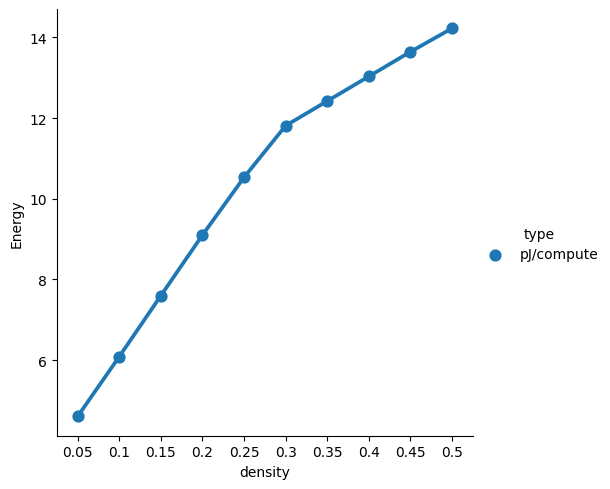

In [49]:
# investigate the relationship between cycle number, energy versus different density
# skip , with compression
r2_E_T_plot = {
    'density': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5],
    'pJ/compute': [4.61, 6.09, 7.6, 9.1, 10.53, 11.81, 12.42, 13.03, 13.64, 14.22],
     'latency': [28, 55, 82, 109, 136, 164, 191, 218, 245, 272]
}

r2_E_T_plot = pd.DataFrame(r2_E_T_plot)
r2_E_T_plot = r2_E_T_plot.melt('density', var_name='type', value_name='Energy')
sns.catplot(x='density', y='Energy', hue='type', data=r2_E_T_plot, kind='point')

In [56]:
# without tiling, skipping
l1_output_r2_skip = run_timeloop_mapper(
    ConfigRegistry.AWB_ARCH_1_PE,
    ConfigRegistry.BASELINE_COMPONENTS,
    prob_widget.dump(),
    ConfigRegistry.BASELINE_MAPPER,
    ConfigRegistry.BASELINE_CONSTRAINTS_OUTPUT,
    ConfigRegistry.BASELINE_SPARSE_OPT / 'skipping.yaml'
)
print(l1_output_r2_skip[0])

input file: tmp.yaml
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___/ 
                                  /_/      

Problem configuration complete.
execute:/usr/local/bin/accelergy tmp.yaml --oprefix timeloop-mapper. -o ./ > timeloop-mapper.accelergy.log 2>&1
Generate Accelergy ERT (energy reference table) to replace internal energy model.
Generate Accelergy ART (area reference table) to replace internal area model.
Architecture configuration complete.
Sparse optimization configuration complete.
Using threads = 4
Mapper configuration complete.
Initializing Index Factorization subspace.
  Factorization options along problem dimension N = 2
  Factorization options along problem dimension M = 4
  Factorization options along problem dimension O = 5
Mapspace Dimension [IndexFactorization] Size: 40
Mapspace Dimension [LoopPe

[  1] Utilization = 1.00 | pJ/Algorithmic-Compute =    7.172 | pJ/Compute =   15.241 | L1[ASO] N2 - L0[] O16 M34 
[  0] Utilization = 1.00 | pJ/Algorithmic-Compute =    7.172 | pJ/Compute =   15.241 | L1[ASO] O1 - L0[] O16 M34 N2 
[  3] Utilization = 1.00 | pJ/Algorithmic-Compute =    7.172 | pJ/Compute =   15.241 | L1[ASO] N2 M34 - L0[] O16 
[  2] Utilization = 1.00 | pJ/Algorithmic-Compute =    7.172 | pJ/Compute =   15.241 | L1[ASO] M34 - L0[] O16 N2 
[  3] Utilization = 1.00 | pJ/Algorithmic-Compute =    6.889 | pJ/Compute =   58.559 | L1[ASO] N2 M34 - L0[S] O16 
[  2] Utilization = 1.00 | pJ/Algorithmic-Compute =    7.455 | pJ/Compute =   31.685 | L1[ASO] M34 - L0[S] O16 N2 
[  3] Utilization = 1.00 | pJ/Algorithmic-Compute =    6.587 | pJ/Compute =   55.990 | L1[ASO] N2 M34 O2 - L0[SO] O8 
[  1] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[  0] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.




Summary stats for best mapping found by mapper:
  Utilization = 1.00 | pJ/Algorithmic-Compute =    6.587 | pJ/Compute =   55.990
Buffer and Arithmetic Levels
----------------------------
Level 0
-------
=== MAC ===

    SPECS
    -----
    Word bits             : 8
    Instances             : 1 (1*1)
    Compute energy        : 0.56 pJ

    STATS
    -----
    Utilized instances (max)     : 1
    Utilized instances (average) : 1
    Cycles                       : 128
    Algorithmic Computes (total) : 1088
    Actual Computes (total)      : 128
    Gated Computes (total)       : 0
    Skipped Computes (total)     : 0
    Energy (total)               : 71.78 pJ
    Area (total)                 : 332.25 um^2


Level 1
-------
=== Buffer ===

    SPECS
    -----
        Technology                   : SRAM
        Data storage size            : 512
        Data word bits               : 8
        Data block size              : 1
        Metadata storage width(bits) : 4
        Metadata s

[  3] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[  2] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.


In [57]:
# without tiling, gating
l1_output_r2_gate = run_timeloop_mapper(
    ConfigRegistry.AWB_ARCH_1_PE,
    ConfigRegistry.BASELINE_COMPONENTS,
    prob_widget.dump(),
    ConfigRegistry.BASELINE_MAPPER,
    ConfigRegistry.BASELINE_CONSTRAINTS_OUTPUT,
    ConfigRegistry.BASELINE_SPARSE_OPT / 'gating.yaml'
)
print(l1_output_r2_gate[0])

input file: tmp.yaml
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___/ 
                                  /_/      

Problem configuration complete.
execute:/usr/local/bin/accelergy tmp.yaml --oprefix timeloop-mapper. -o ./ > timeloop-mapper.accelergy.log 2>&1
Generate Accelergy ERT (energy reference table) to replace internal energy model.
Generate Accelergy ART (area reference table) to replace internal area model.
Architecture configuration complete.
Sparse optimization configuration complete.
Using threads = 4
Mapper configuration complete.
Initializing Index Factorization subspace.
  Factorization options along problem dimension N = 2
  Factorization options along problem dimension M = 4
  Factorization options along problem dimension O = 5
Mapspace Dimension [IndexFactorization] Size: 40
Mapspace Dimension [LoopPe

[  2] Utilization = 1.00 | pJ/Algorithmic-Compute =    7.172 | pJ/Compute =   15.241 | L1[ASO] M34 - L0[] O16 N2 
[  3] Utilization = 1.00 | pJ/Algorithmic-Compute =    7.172 | pJ/Compute =   15.241 | L1[ASO] N2 M34 - L0[] O16 
[  0] Utilization = 1.00 | pJ/Algorithmic-Compute =    7.172 | pJ/Compute =   15.241 | L1[ASO] O1 - L0[] O16 M34 N2 
[  2] Utilization = 1.00 | pJ/Algorithmic-Compute =    7.455 | pJ/Compute =   31.685 | L1[ASO] M34 - L0[S] O16 N2 
[  3] Utilization = 1.00 | pJ/Algorithmic-Compute =    6.889 | pJ/Compute =   58.559 | L1[ASO] N2 M34 - L0[S] O16 
[  1] Utilization = 1.00 | pJ/Algorithmic-Compute =    7.172 | pJ/Compute =   15.241 | L1[ASO] N2 - L0[] O16 M34 
[  3] Utilization = 1.00 | pJ/Algorithmic-Compute =    6.587 | pJ/Compute =   55.990 | L1[ASO] N2 M34 O2 - L0[SO] O8 
[  0] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[  2] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[  1] STATE



Summary stats for best mapping found by mapper:
  Utilization = 1.00 | pJ/Algorithmic-Compute =    6.587 | pJ/Compute =   55.990
Buffer and Arithmetic Levels
----------------------------
Level 0
-------
=== MAC ===

    SPECS
    -----
    Word bits             : 8
    Instances             : 1 (1*1)
    Compute energy        : 0.56 pJ

    STATS
    -----
    Utilized instances (max)     : 1
    Utilized instances (average) : 1
    Cycles                       : 128
    Algorithmic Computes (total) : 1088
    Actual Computes (total)      : 128
    Gated Computes (total)       : 0
    Skipped Computes (total)     : 0
    Energy (total)               : 71.78 pJ
    Area (total)                 : 332.25 um^2


Level 1
-------
=== Buffer ===

    SPECS
    -----
        Technology                   : SRAM
        Data storage size            : 512
        Data word bits               : 8
        Data block size              : 1
        Metadata storage width(bits) : 4
        Metadata s

[  3] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.


In [25]:
# #  tiling, skipping
# l1_output_r2_skip = run_timeloop_mapper(
#     ConfigRegistry.AWB_ARCH_1_PE,
#     ConfigRegistry.BASELINE_COMPONENTS,
#     prob_widget.dump(),
#     ConfigRegistry.BASELINE_MAPPER,
#     ConfigRegistry.BASELINE_CONSTRAINTS_OUTPUT,
#     ConfigRegistry.AWB_SPARSE_OPT / 'skipping-pretiled.yaml'
# )
# print(l1_output_r2_skip[0])

In [26]:
# # tiling, gating
# l1_output_r2_gate = run_timeloop_mapper(
#     ConfigRegistry.AWB_ARCH_1_PE,
#     ConfigRegistry.BASELINE_COMPONENTS,
#     prob_widget.dump(),
#     ConfigRegistry.BASELINE_MAPPER,
#     ConfigRegistry.BASELINE_CONSTRAINTS_OUTPUT,
#     ConfigRegistry.AWB_SPARSE_OPT / 'gating-pretiled.yaml'
# )
# print(l1_output_r2_gate[0])

In [20]:
# without sparsity
r2_E_T = {
    'pJ/compute': [13.86],
    'latency': [18496]
}

# skipping, without compression
r2_E_T_skipping = {
    'row ID': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34],
    'density': [ 0.47058823529411764, 0.2647058823529412, 0.29411764705882354, 0.17647058823529413, 0.08823529411764706, 0.11764705882352941, 0.11764705882352941, 0.11764705882352941, 0.14705882352941177, 0.058823529411764705, 0.08823529411764706, 0.029411764705882353, 0.058823529411764705, 0.14705882352941177, 0.058823529411764705, 0.058823529411764705, 0.058823529411764705, 0.058823529411764705, 0.058823529411764705, 0.08823529411764706, 0.058823529411764705, 0.058823529411764705, 0.058823529411764705, 0.14705882352941177, 0.08823529411764706, 0.08823529411764706, 0.058823529411764705, 0.11764705882352941, 0.08823529411764706, 0.11764705882352941, 0.11764705882352941, 0.17647058823529413, 0.35294117647058826, 0.5],
    'pJ/compute': [13.86, 10.98, 11.76],
    'latency': [256, 144,]
}

# gating, , without compression
r2_E_T_gating = {
    'row ID': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34],
    'density': [ 0.47058823529411764, 0.2647058823529412, 0.29411764705882354, 0.17647058823529413, 0.08823529411764706, 0.11764705882352941, 0.11764705882352941, 0.11764705882352941, 0.14705882352941177, 0.058823529411764705, 0.08823529411764706, 0.029411764705882353, 0.058823529411764705, 0.14705882352941177, 0.058823529411764705, 0.058823529411764705, 0.058823529411764705, 0.058823529411764705, 0.058823529411764705, 0.08823529411764706, 0.058823529411764705, 0.058823529411764705, 0.058823529411764705, 0.14705882352941177, 0.08823529411764706, 0.08823529411764706, 0.058823529411764705, 0.11764705882352941, 0.08823529411764706, 0.11764705882352941, 0.11764705882352941, 0.17647058823529413, 0.35294117647058826, 0.5],
    'pJ/compute': [13.86, 10.98,11.76],
    'latency': [256, 144, ]
}


a_capacity_df = pd.DataFrame(a_capacity_df)
a_capacity_df['total'] = a_capacity_df['data'] + a_capacity_df['format']
a_capacity_df = a_capacity_df.melt('density', var_name='type', value_name='space')
sns.catplot(x='density', y='space', hue='type', data=a_capacity_df, kind='point')

SyntaxError: invalid syntax (2758768669.py, line 35)